# MNIST Database Exploration
In this notebook, we will look at the MNIST Database and accomplish the following:
1. Loading the MNIST database from Keras
2. Visualizing data points in the database
3. Curate our very own 4-digit binary number

## MNIST Database
The _NIST_ database is a database of handwritten digits containing a training set of 60,000 examples and a test set of 10,000 examples. It is a subset of a larger set available from _NIST_.

The original black and white images from _NIST_ has been size-normalized to fit in a 20x20 pixel box while preserving aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. The images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

## Importing libraries
For now, let's import the following libraries.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

Let's look at each of the imported libraries in more detail.

**Matplotlib**<br>
A comprehensive library to create static, animated, and interactive visualizations in python. We would primarily be using this to visualize our _MNIST_ datapoints.<br><br>
_Note: "%matplotlib inline" allows us to circumvent having to use plt.show()._

**TensorFlow**<br>
TensorFlow is a powerful open-source library for Machine Learning and Deep Learning. We would be primariliy be using the _Keras_ module to implement Neural Networks.

## Loading the MNIST Database
Let's get down to loading the MNIST database

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Visualizing data points

### Image Representation

### Single Example

Type one data point: <class 'numpy.ndarray'>


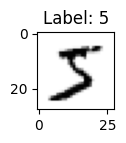

In [5]:
# imshow refers to Image show
## Displays data as an image, i.e. on a 2D raster
## The input may either be actual RGB(A) data, or 2D scalar data, which will be rendered as a pseudocolor image.
## For displaying a grayscale image set up the colormapping using the parameters cmap='gray', vmin=0, vmax=255.
fig, ax = plt.subplots(1, 1, figsize=(1,1))
ax.imshow(x_train[0], cmap = "Greys")
ax.set_title(f"Label: {y_train[0]}")

print(f"Type one data point: {type(x_train[0])}")

### One of Each Label

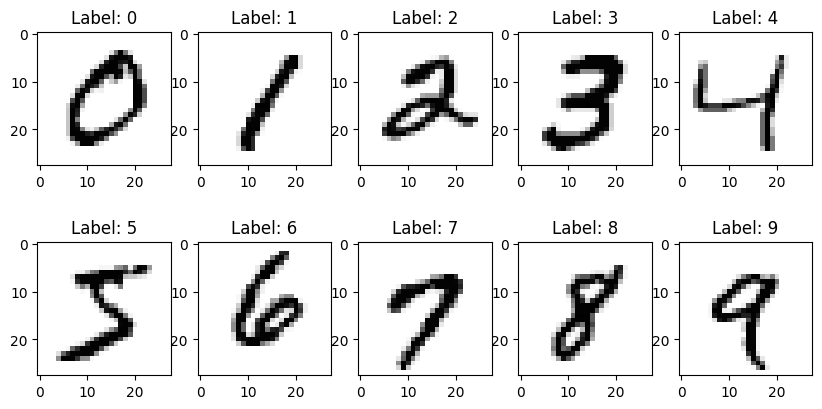

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(10,5))
for i in range(10):
    sample = x_train[y_train==i][0]
    ax[int(i/5)][int(i%5)].imshow(sample, cmap="Greys")
    ax[int(i/5)][int(i%5)].set_title(f"Label: {i}")

### Single Data Point Representation
As mentioned, each data point is a 28x28 pixel image. In matrix form, the data would be represented as:
$$
\underset{28 \times 28}{\text{M}} : \text{element } e \in [0, 255]
$$
where $0$ is a completely white pixel and $255$ is a completely dark pixel.<br><br>
Below is the data representation of the example labeled '$5$'

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Curating Data
Relevant to our project, we want to concatenate multiple examples, each of a single digit, to form a longer number with multiple digits. For a start, let's try to render the upper half of a data point.

### Segmenting data points

Text(0.5, 1.0, 'Label: 5')

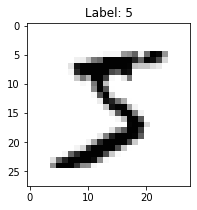

In [7]:
# We'll use this example as an experiment
sampleFeature = x_train[0]
sampleLabel = y_train[0]

fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.imshow(sampleFeature, cmap = "Greys")
ax.set_title(f"Label: {sampleLabel}")

Text(0.5, 1.0, 'Label: 5')

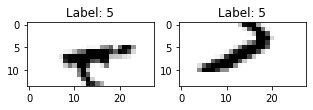

In [8]:
# ':n' Selects all columns and the first n rows
upper_sampleFeature = sampleFeature[:14, :]
lower_sampleFeature = sampleFeature[14:28, :]

fig, ax = plt.subplots(1, 2, figsize=(5,5))
ax[0].imshow(upper_sampleFeature, cmap="Greys")
ax[0].set_title(f"Label: {sampleLabel}")
ax[1].imshow(lower_sampleFeature, cmap="Greys")
ax[1].set_title(f"Label: {sampleLabel}")

We can see that by splicing the data point into its upper and lower rows, the result is equivalent to segmenting the image into upper and lower halves. We can conlude from this that the image is rendered row-wise, left to right.

### Concatenating data points
Let's attempt to concatenate two data points and render them. We'll use NumPy's hstack() to horizontally stack both ndarrays.

Text(0.5, 1.0, 'Label: 0')

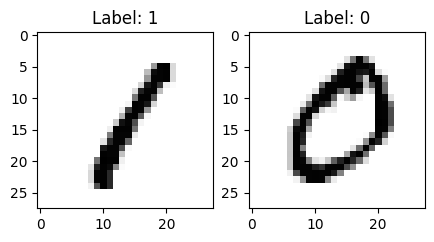

In [23]:
# Select our two examples to experiment on
left_sampleFeature = x_train[y_train==1][0]
right_sampleFeature = x_train[1]
left_sampleLabel = 1
right_sampleLabel = y_train[1]

# Render them...
fig, ax = plt.subplots(1, 2, figsize=(5,5))
ax[0].imshow(left_sampleFeature, cmap="Greys")
ax[0].set_title(f"Label: {left_sampleLabel}")
ax[1].imshow(right_sampleFeature, cmap="Greys")
ax[1].set_title(f"Label: {right_sampleLabel}")

Text(0.5, 1.0, 'Label: 10')

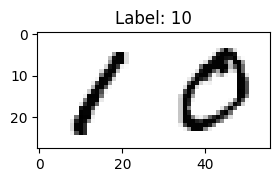

In [24]:
# Stack them up horizontally
stacked_sampleFeature = np.hstack((left_sampleFeature, right_sampleFeature))
# Concatenate the labels. i.e. '5' + '0' = '50'
stacked_sampleLabel = int(str(left_sampleLabel) + str(right_sampleLabel))

# Render
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.imshow(stacked_sampleFeature, cmap="Greys")
ax.set_title(f"Label: {stacked_sampleLabel}")